<a href="https://colab.research.google.com/github/zahabkf/sampling-algorithms-for-unbalanced-data-/blob/main/FAKEJobPosting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving fake_job_postings.csv to fake_job_postings.csv


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data = pd.read_csv("fake_job_postings.csv", header = "infer")
data.head(15)

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,1,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0
3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,5,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0
5,6,Accounting Clerk,"US, MD,",NaN,NaN,NaN,Job OverviewApex is an environmental consultin...,NaN,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,0
6,7,Head of Content (m/f),"DE, BE, Berlin",ANDROIDPIT,20000-28000,"Founded in 2009, the Fonpit AG rose with its i...",Your Responsibilities: Manage the English-spea...,Your Know-How: ...,Your Benefits: Being part of a fast-growing co...,0,1,1,Full-time,Mid-Senior level,Master's Degree,Online Media,Management,0
7,8,Lead Guest Service Specialist,"US, CA, San Francisco",NaN,NaN,Airenvy’s mission is to provide lucrative yet ...,Who is Airenvy?Hey there! We are seasoned entr...,"Experience with CRM software, live chat, and p...",Competitive Pay. You'll be able to eat steak e...,0,1,1,NaN,NaN,NaN,NaN,NaN,0
8,9,HP BSM SME,"US, FL, Pensacola",NaN,NaN,Solutions3 is a woman-owned small business who...,Implementation/Configuration/Testing/Training ...,MUST BE A US CITIZEN.An active TS/SCI clearanc...,NaN,0,1,1,Full-time,Associate,NaN,Information Technology and Services,NaN,0
9,10,Customer Service Associate - Part Time,"US, AZ, Phoenix",NaN,NaN,"Novitex Enterprise Solutions, formerly Pitney ...",The Customer Service Associate will be based i...,Minimum Requirements:Minimum of 6 months custo...,NaN,0,1,0,Part-time,Entry level,High School or equivalent,Financial Services,Customer Service,0


In [ ]:
data.shape
data["fraudulent"]

0        0
1        0
2        0
3        0
4        0
        ..
17875    0
17876    0
17877    0
17878    0
17879    0
Name: fraudulent, Length: 17880, dtype: int64

<ipython-input-6-6d6bec36554c>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  g = sns.barplot(x = target_group['fraudulent'],y = target_group[0],palette=np.array(pal[::-1])[rank] )
<ipython-input-6-6d6bec36554c>:5: UserWarning: Numpy array is not a supported type for `palette`. Please convert your palette to a list. This will become an error in v0.14
  g = sns.barplot(x = target_group['fraudulent'],y = target_group[0],palette=np.array(pal[::-1])[rank] )


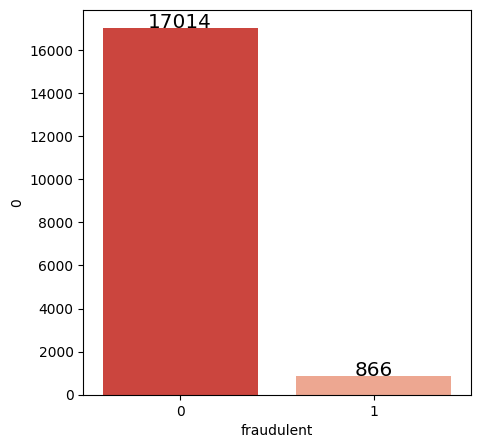

In [ ]:
plt.figure(figsize=(5,5))
target_group = data.groupby('fraudulent').size().reset_index()
pal = sns.color_palette("Reds", len(target_group))
rank = target_group["fraudulent"].argsort().argsort()
g = sns.barplot(x = target_group['fraudulent'],y = target_group[0],palette=np.array(pal[::-1])[rank] )

for index, row in target_group.iterrows():
    g.text(row['fraudulent'],row[0], round(row[0],2), color='black', ha="center",fontsize='x-large')

In [ ]:
print("No. of missing values: ")
for val in data.columns:
  print("\t%s: %d" % (val, data[val].isna().sum()))

No. of missing values: 
	job_id: 0
	title: 0
	location: 346
	department: 11547
	salary_range: 15012
	company_profile: 3308
	description: 1
	requirements: 2695
	benefits: 7210
	telecommuting: 0
	has_company_logo: 0
	has_questions: 0
	employment_type: 3471
	required_experience: 7050
	required_education: 8105
	industry: 4903
	function: 6455
	fraudulent: 0


In [ ]:
data.head()

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,1,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0
3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,5,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0


In [ ]:
drop_cols = ['title','location','department','salary_range','company_profile','description','requirements','benefits','employment_type','required_experience','required_education','industry','function']
data = data.drop(drop_cols, axis = 1)

In [ ]:
data.head()

,job_id,telecommuting,has_company_logo,has_questions,fraudulent
0,1,0,1,0,0
1,2,0,1,0,0
2,3,0,1,0,0
3,4,0,1,0,0
4,5,0,1,1,0


In [ ]:
dup_data = data.duplicated()
print("No. of duplicated rows: %d" % (dup_data.sum()))

No. of duplicated rows: 0


#**USING SMOTE SAMPLING ALGORITHM (RF, SVM, DNN)**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import StandardScaler

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

#Splitting data into: features (X) and target (y)
X = data.drop(columns=['fraudulent'])
y = data['fraudulent']

#Standardizing/Normalizing features
scler = StandardScaler() #method for standardizing features by removing the mean and scaling to unit variance.
X_scaled = scler.fit_transform(X) #standardize the features in the X df, fits the scler to the data (calculates mean and SD), then transforms the data using the calculated mean and standard deviation to achieve standardization

#Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [ ]:
from imblearn.over_sampling import SMOTE

# Specify the desired ratio after resampling
# For example, if you want the minority class to have twice as many samples as the majority class:
desired_ratio = 0.5  # ratio of minority to majority class

# Initialize SMOTE with the desired ratio
smoteAlg = SMOTE(sampling_strategy=desired_ratio, random_state=42)

# Apply SMOTE to the training data to balance the classes
X_train_bal, y_train_bal = smoteAlg.fit_resample(X_train, y_train)


In [ ]:
from sklearn.ensemble import RandomForestClassifier
#Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

#^^^X_train, X_test, y_train, y_test contain the preprocessed data ready for training/testing

smoteAlg = SMOTE(random_state=42)
X_train_bal, y_train_bal = smoteAlg.fit_resample(X_train, y_train)

# Training the classifier
clf_balanced = RandomForestClassifier(random_state=42)
clf_balanced.fit(X_train_bal, y_train_bal)

# Predictions
y_pred = clf_balanced.predict(X_test)

# Step 4: Record precision and recall
precision_recall = classification_report(y_test, y_pred, output_dict=True)

accuracy_rf = accuracy_score(y_test, y_pred)
print("Accuracy rf:", accuracy_rf)


pd.DataFrame(precision_recall)

Accuracy rf: 0.808351976137211


,0,1,accuracy,macro avg,weighted avg
precision,0.985431,0.178420,0.808352,0.581925,0.944659
recall,0.810132,0.774908,0.808352,0.792520,0.808352
f1-score,0.889224,0.290055,0.808352,0.589640,0.858953
support,5093.000000,271.000000,0.808352,5364.000000,5364.000000


In [ ]:
import numpy as np

# Count the occurrences of each class in y_train_bal
class_counts = np.bincount(y_train_bal)

# Print the class distribution
for class_label, count in enumerate(class_counts):
    print(f"Class {class_label}: {count} samples")


Class 0: 11921 samples
Class 1: 11921 samples


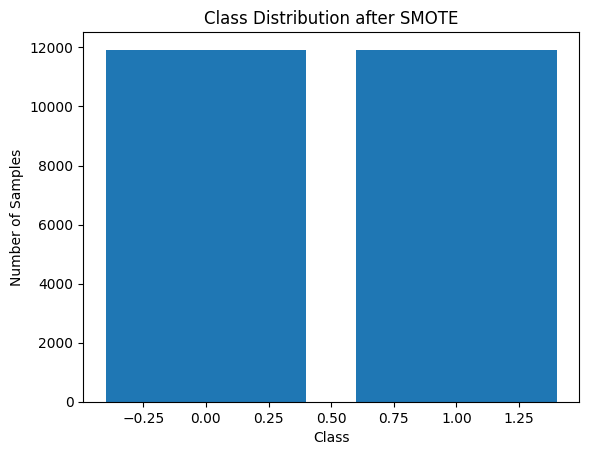

In [ ]:
import matplotlib.pyplot as plt

# Plot the class distribution
plt.bar(range(len(class_counts)), class_counts)
plt.xlabel('Class')
plt.ylabel('Number of Samples')
plt.title('Class Distribution after SMOTE')
plt.show()

In [ ]:
from sklearn.metrics import confusion_matrix

# How the confusion matrix matrix is calculated
conf_mat = confusion_matrix(y_test, y_pred)

# Print confusion matrix
print("Confusion Matrix:")
print(conf_mat)

# The confusion matrix prints like this:
# [True Positive (TP), False Negative (FN)]
# [False Positive (FP), True Negative (TN)]

Confusion Matrix:
[[4126  967]
 [  61  210]]


In [ ]:
from sklearn import svm
from sklearn.svm import SVC  # Support Vector Classification
from sklearn.svm import SVR  # Support Vector Regression
from sklearn.metrics import accuracy_score, classification_report

# Initialize the SVM classifier
svm_classifier = SVC(kernel='linear', random_state=42)

# Train the SVM classifier
svm_classifier.fit(X_train_bal, y_train_bal)

# Make predictions on the testing set
y_pred = svm_classifier.predict(X_test)

# Evaluate the model's performance
accuracy_svm = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy_svm)
print("\nClassification Report:\n", report)

Accuracy: 0.8044369873228934

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.81      0.89      5093
           1       0.17      0.71      0.27       271

    accuracy                           0.80      5364
   macro avg       0.57      0.76      0.58      5364
weighted avg       0.94      0.80      0.86      5364



In [ ]:
data.shape

(17880, 5)

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense


#Splitting data into: features (X) and target (y)
X = data.drop(columns=['fraudulent'])
y = data['fraudulent']

#Standardizing/Normalizing features
scler = StandardScaler() #method for standardizing features by removing the mean and scaling to unit variance.
X_scaled = scler.fit_transform(X) #standardize the features in the X df, fits the scler to the data (calculates mean and SD), then transforms the data using the calculated mean and standard deviation to achieve standardization


#Split the data into training, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

smoteAlg = SMOTE(random_state=42)
X_train_bal, y_train_bal = smoteAlg.fit_resample(X_train, y_train)

X_val_bal, y_val_bal = smoteAlg.fit_resample(X_val, y_val)

# Define the model architecture
model = Sequential([
    Dense(64, activation='relu', input_shape=(4,)),  # Input layer
    Dense(64, activation='relu'),  # Hidden layer
    Dense(1, activation='sigmoid')  # Output layer (binary classification)
])

# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
'''
print(X_train.shape)
print(model.input_shape)
'''

# Train the model
history = model.fit(X_train,y_train, epochs=10, batch_size=32, validation_data=(X_val_bal, y_val_bal))

# Evaluate the model on the test set
loss, accuracy_dnn = model.evaluate(X_test, y_test)

# Make predictions
y_pred = model.predict(X_test)

test_accuracy_percentage = accuracy_dnn * 100

print("dnn smote test Accuracy: {:.2f}%".format(test_accuracy_percentage))

Epoch 1/10
447/447 [==============================] - 2s 3ms/step - loss: 7.7559 - accuracy: 0.8986 - val_loss: 77.5950 - val_accuracy: 0.5000
Epoch 2/10
447/447 [==============================] - 1s 3ms/step - loss: 3.9086 - accuracy: 0.9030 - val_loss: 10.9571 - val_accuracy: 0.5000
Epoch 3/10
447/447 [==============================] - 1s 2ms/step - loss: 4.3590 - accuracy: 0.9047 - val_loss: 39.0100 - val_accuracy: 0.5000
Epoch 4/10
447/447 [==============================] - 1s 3ms/step - loss: 4.0768 - accuracy: 0.9047 - val_loss: 16.0310 - val_accuracy: 0.5000
Epoch 5/10
447/447 [==============================] - 1s 2ms/step - loss: 3.6720 - accuracy: 0.9083 - val_loss: 35.9295 - val_accuracy: 0.5000
Epoch 6/10
447/447 [==============================] - 1s 2ms/step - loss: 3.5326 - accuracy: 0.9101 - val_loss: 5.2272 - val_accuracy: 0.5000
Epoch 7/10
447/447 [==============================] - 1s 2ms/step - loss: 2.8063 - accuracy: 0.9093 - val_loss: 54.4048 - val_accuracy: 0.5000


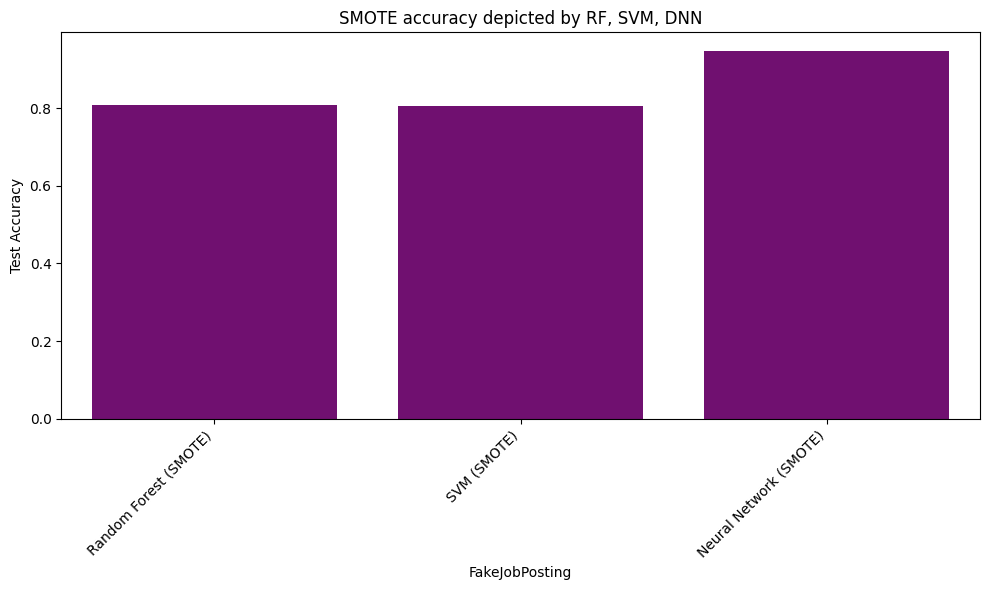

In [ ]:
test_accuracies = {
    'Random Forest (SMOTE)': accuracy_rf,
    'SVM (SMOTE)': accuracy_svm,
    'Neural Network (SMOTE)': accuracy_dnn,
}


# Plotting the test accuracy for each algorithm

plt.figure(figsize=(10, 6))
sns.barplot(x=list(test_accuracies.keys()), y=list(test_accuracies.values()), color='purple')
plt.xticks(rotation=45, ha='right')
plt.title('SMOTE accuracy depicted by RF, SVM, DNN')
plt.xlabel('FakeJobPosting')
plt.ylabel('Test Accuracy')
plt.tight_layout()
plt.show()

#**USING ADASYN SAMPLING ALGORITHM (RF, SVM, DNN)**

In [ ]:
from imblearn.over_sampling import ADASYN
from sklearn.model_selection import train_test_split
import pandas as pd

# Assuming 'X' is your feature matrix and 'y' is your target vector
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Check the class distribution after applying ADASYN
print("Class distribution before ADASYN:")
print(pd.Series(y_train).value_counts())

# Apply ADASYN to balance the training set
adasyn = ADASYN(random_state=42, sampling_strategy=1.0)
X_train_resampled, y_train_resampled = adasyn.fit_resample(X_train, y_train)

# Check the class distribution after applying ADASYN
print("Class distribution after ADASYN:")
print(pd.Series(y_train_resampled).value_counts())

Class distribution before ADASYN:
0    13619
1      685
Name: fraudulent, dtype: int64
Class distribution after ADASYN:
1    13749
0    13619
Name: fraudulent, dtype: int64


In [ ]:
clf_balanced = RandomForestClassifier(random_state=42)
clf_balanced.fit(X_train_resampled, y_train_resampled)

# Predictions
y_pred = clf_balanced.predict(X_test)

# Step 4: Record precision and recall
precision_recall = classification_report(y_test, y_pred, output_dict=True)

accuracy_rf_adasyn = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy_rf_adasyn)

pd.DataFrame(precision_recall)

Accuracy: 0.7360178970917226


,0,1,accuracy,macro avg,weighted avg
precision,0.989222,0.143791,0.736018,0.566506,0.946430
recall,0.729897,0.850829,0.736018,0.790363,0.736018
f1-score,0.840000,0.246006,0.736018,0.543003,0.809935
support,3395.000000,181.000000,0.736018,3576.000000,3576.000000


In [ ]:
# Initialize the SVM classifier
svm_classifier = SVC(kernel='linear', random_state=42)

# Train the SVM classifier
svm_classifier.fit(X_train_resampled, y_train_resampled)

# Make predictions on the testing set
y_pred = svm_classifier.predict(X_test)

# Evaluate the model's performance
accuracy_svm_adasyn  = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy_svm_adasyn )
print("\nClassification Report:\n", report)

Accuracy: 0.8008948545861297

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.81      0.88      3395
           1       0.16      0.69      0.26       181

    accuracy                           0.80      3576
   macro avg       0.57      0.75      0.57      3576
weighted avg       0.94      0.80      0.85      3576



In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense


#Splitting data into: features (X) and target (y)
X = data.drop(columns=['fraudulent'])
y = data['fraudulent']

#Standardizing/Normalizing features
scler = StandardScaler() #method for standardizing features by removing the mean and scaling to unit variance.
X_scaled = scler.fit_transform(X) #standardize the features in the X df, fits the scler to the data (calculates mean and SD), then transforms the data using the calculated mean and standard deviation to achieve standardization


#Split the data into training, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

adasyn = ADASYN(random_state=42, sampling_strategy=1.0)
X_train_resampled, y_train_resampled = adasyn.fit_resample(X_train, y_train)

X_val_bal, y_val_bal = adasyn.fit_resample(X_val, y_val)

# Define the model architecture
model = Sequential([
    Dense(64, activation='relu', input_shape=(4,)),  # Input layer
    Dense(64, activation='relu'),  # Hidden layer
    Dense(1, activation='sigmoid')  # Output layer (binary classification)
])

# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(X_train,y_train, epochs=10, batch_size=32, validation_data=(X_val_bal, y_val_bal))

# Evaluate the model on the test set
loss, accuracy_dnn_adasyn = model.evaluate(X_test, y_test)

# Make predictions
y_pred = model.predict(X_test)

test_accuracy_percentage = accuracy_dnn_adasyn * 100

print("dnn adaysn test Accuracy: {:.2f}%".format(test_accuracy_percentage))

Epoch 1/10
447/447 [==============================] - 2s 3ms/step - loss: 0.1926 - accuracy: 0.9470 - val_loss: 1.3336 - val_accuracy: 0.5009
Epoch 2/10
447/447 [==============================] - 2s 4ms/step - loss: 0.1555 - accuracy: 0.9520 - val_loss: 1.2995 - val_accuracy: 0.5009
Epoch 3/10
447/447 [==============================] - 1s 2ms/step - loss: 0.1501 - accuracy: 0.9555 - val_loss: 1.3772 - val_accuracy: 0.5289
Epoch 4/10
447/447 [==============================] - 1s 3ms/step - loss: 0.1447 - accuracy: 0.9589 - val_loss: 1.2300 - val_accuracy: 0.5271
Epoch 5/10
447/447 [==============================] - 2s 4ms/step - loss: 0.1409 - accuracy: 0.9616 - val_loss: 1.3050 - val_accuracy: 0.5188
Epoch 6/10
447/447 [==============================] - 2s 4ms/step - loss: 0.1397 - accuracy: 0.9620 - val_loss: 1.4221 - val_accuracy: 0.5021
Epoch 7/10
447/447 [==============================] - 1s 3ms/step - loss: 0.1370 - accuracy: 0.9626 - val_loss: 1.1961 - val_accuracy: 0.5312
Epoch 

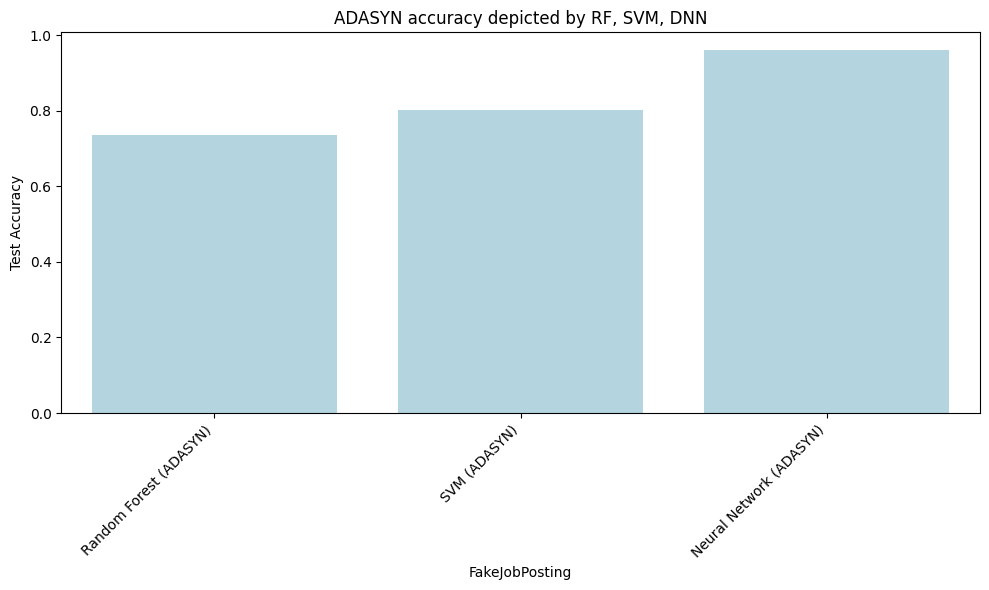

In [ ]:
test_accuracies = {
    'Random Forest (ADASYN)': accuracy_rf_adasyn,
    'SVM (ADASYN)': accuracy_svm_adasyn,
    'Neural Network (ADASYN)': accuracy_dnn_adasyn,
}


# Plotting the test accuracy for each algorithm

plt.figure(figsize=(10, 6))
sns.barplot(x=list(test_accuracies.keys()), y=list(test_accuracies.values()), color='lightblue')
plt.xticks(rotation=45, ha='right')
plt.title('ADASYN accuracy depicted by RF, SVM, DNN')
plt.xlabel('FakeJobPosting')
plt.ylabel('Test Accuracy')
plt.tight_layout()
plt.show()

#**USING RANDOM OVER SAMPLING ALGORITHM (RF, SVM, DNN)**

In [ ]:
from imblearn.over_sampling import RandomOverSampler
import pandas as pd

# Assuming 'X' is your feature matrix and 'y' is your target vector
ros = RandomOverSampler(random_state=42)
X_resampled, y_resampled = ros.fit_resample(X_train, y_train)

# Check the class distribution after oversampling
print("Class distribution after Random Oversampling:")
print(pd.Series(y_resampled).value_counts())

Class distribution after Random Oversampling:
0    13619
1    13619
Name: fraudulent, dtype: int64


In [ ]:
# Training the classifier
clf_balanced = RandomForestClassifier(random_state=42)
clf_balanced.fit(X_resampled, y_resampled)

# Predictions
y_pred = clf_balanced.predict(X_test)

# Step 4: Record precision and recall
precision_recall = classification_report(y_test, y_pred, output_dict=True)

accuracy_rf_random_oversampling = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy_rf_random_oversampling)

pd.DataFrame(precision_recall)

Accuracy: 0.9546979865771812


,0,1,accuracy,macro avg,weighted avg
precision,0.977501,0.565657,0.954698,0.771579,0.955850
recall,0.974616,0.595745,0.954698,0.785180,0.954698
f1-score,0.976057,0.580311,0.954698,0.778184,0.955251
support,1694.000000,94.000000,0.954698,1788.000000,1788.000000


In [ ]:
# Initialize the SVM classifier
svm_classifier = SVC(kernel='linear', random_state=42)

# Train the SVM classifier
svm_classifier.fit(X_resampled, y_resampled)

# Make predictions on the testing set
y_pred = svm_classifier.predict(X_test)

# Evaluate the model's performance
accuracy_svm_random_oversampling = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy_svm_random_oversampling)
print("\nClassification Report:\n", report)

Accuracy: 0.8053691275167785

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.81      0.89      1694
           1       0.17      0.71      0.28        94

    accuracy                           0.81      1788
   macro avg       0.58      0.76      0.58      1788
weighted avg       0.94      0.81      0.86      1788



In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense


#Splitting data into: features (X) and target (y)
X = data.drop(columns=['fraudulent'])
y = data['fraudulent']

#Standardizing/Normalizing features
scler = StandardScaler() #method for standardizing features by removing the mean and scaling to unit variance.
X_scaled = scler.fit_transform(X) #standardize the features in the X df, fits the scler to the data (calculates mean and SD), then transforms the data using the calculated mean and standard deviation to achieve standardization


#Split the data into training, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Apply ros to balance the training set
ros = RandomOverSampler(random_state=42)
X_resampled, y_resampled = ros.fit_resample(X_train, y_train)

X_val_bal, y_val_bal = ros.fit_resample(X_val, y_val)

# Define the model architecture
model = Sequential([
    Dense(64, activation='relu', input_shape=(4,)),  # Input layer
    Dense(64, activation='relu'),  # Hidden layer
    Dense(1, activation='sigmoid')  # Output layer (binary classification)
])

# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(X_train,y_train, epochs=10, batch_size=32, validation_data=(X_val_bal, y_val_bal))

# Evaluate the model on the test set
loss, accuracy_dnn_random_oversampling = model.evaluate(X_test, y_test)

# Make predictions
y_pred = model.predict(X_test)

test_accuracy_percentage = accuracy_dnn_random_oversampling * 100

print("dnn random oversampling test Accuracy: {:.2f}%".format(test_accuracy_percentage))

Epoch 1/10
447/447 [==============================] - 2s 3ms/step - loss: 0.1913 - accuracy: 0.9443 - val_loss: 1.1831 - val_accuracy: 0.5059
Epoch 2/10
447/447 [==============================] - 2s 4ms/step - loss: 0.1564 - accuracy: 0.9523 - val_loss: 1.1532 - val_accuracy: 0.5065
Epoch 3/10
447/447 [==============================] - 2s 4ms/step - loss: 0.1502 - accuracy: 0.9553 - val_loss: 1.0382 - val_accuracy: 0.5335
Epoch 4/10
447/447 [==============================] - 1s 3ms/step - loss: 0.1458 - accuracy: 0.9596 - val_loss: 1.0337 - val_accuracy: 0.6570
Epoch 5/10
447/447 [==============================] - 1s 3ms/step - loss: 0.1425 - accuracy: 0.9602 - val_loss: 1.0747 - val_accuracy: 0.6279
Epoch 6/10
447/447 [==============================] - 1s 2ms/step - loss: 0.1391 - accuracy: 0.9620 - val_loss: 1.0815 - val_accuracy: 0.6055
Epoch 7/10
447/447 [==============================] - 1s 3ms/step - loss: 0.1370 - accuracy: 0.9621 - val_loss: 0.9787 - val_accuracy: 0.6599
Epoch 

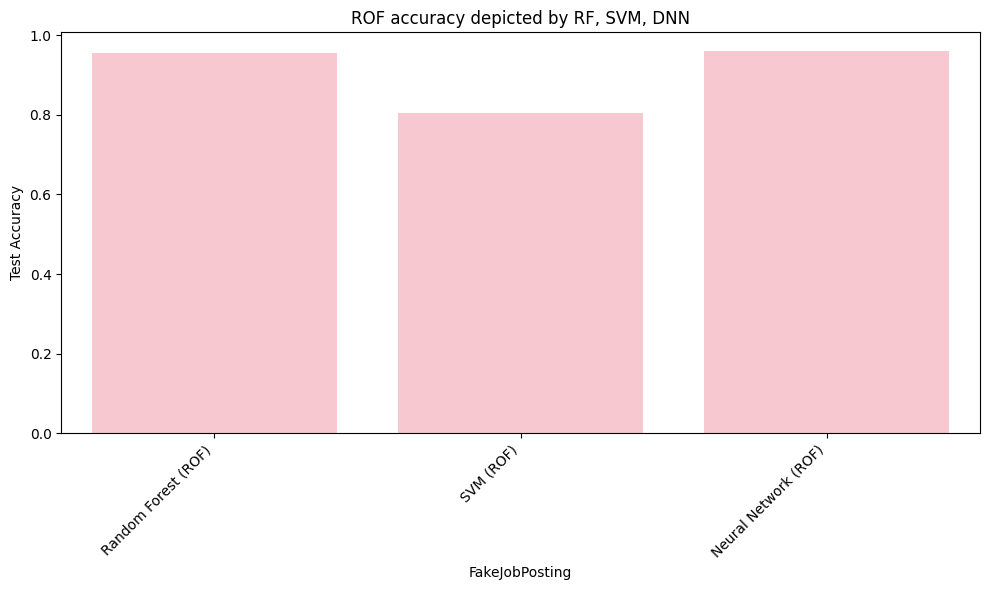

In [ ]:
test_accuracies = {
    'Random Forest (ROF)': accuracy_rf_random_oversampling,
    'SVM (ROF)': accuracy_svm_random_oversampling,
    'Neural Network (ROF)': accuracy_dnn_random_oversampling,
}


# Plotting the test accuracy for each algorithm

plt.figure(figsize=(10, 6))
sns.barplot(x=list(test_accuracies.keys()), y=list(test_accuracies.values()), color='pink')
plt.xticks(rotation=45, ha='right')
plt.title('ROF accuracy depicted by RF, SVM, DNN')
plt.xlabel('FakeJobPosting')
plt.ylabel('Test Accuracy')
plt.tight_layout()
plt.show()

#**USING RANDOM UNDER SAMPLING ALGORITHM (RF, SVM, DNN)**

In [ ]:
from imblearn.under_sampling import RandomUnderSampler
import pandas as pd

# Assuming 'X' is your feature matrix and 'y' is your target vector
rus = RandomUnderSampler(random_state=42)
X_resampled, y_resampled = rus.fit_resample(X_train, y_train)

# Check the class distribution after oversampling
print("Class distribution after Random Oversampling:")
print(pd.Series(y_resampled).value_counts())

Class distribution after Random Oversampling:
0    685
1    685
Name: fraudulent, dtype: int64


In [ ]:
# Training the classifier
clf_balanced = RandomForestClassifier(random_state=42)
clf_balanced.fit(X_resampled, y_resampled)

# Predictions
y_pred = clf_balanced.predict(X_test)

# Step 4: Record precision and recall
precision_recall = classification_report(y_test, y_pred, output_dict=True)

accuracy_rf_random_undersampling = accuracy_score(y_test, y_pred)
print("Accuracy rf random undersampling:",accuracy_rf_random_undersampling)

pd.DataFrame(precision_recall)

Accuracy rf random undersampling: 0.7516778523489933


,0,1,accuracy,macro avg,weighted avg
precision,0.992126,0.162162,0.751678,0.577144,0.948493
recall,0.743802,0.893617,0.751678,0.818709,0.751678
f1-score,0.850202,0.274510,0.751678,0.562356,0.819937
support,1694.000000,94.000000,0.751678,1788.000000,1788.000000


In [ ]:
# Initialize the SVM classifier
svm_classifier = SVC(kernel='linear', random_state=42)

# Train the SVM classifier
svm_classifier.fit(X_resampled, y_resampled)

# Make predictions on the testing set
y_pred = svm_classifier.predict(X_test)

# Evaluate the model's performance
accuracy_svm_random_undersampling = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Accuracy svm random undersampling:", accuracy_svm_random_undersampling)
print("\nClassification Report:\n", report)

Accuracy svm random undersampling: 0.8053691275167785

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.81      0.89      1694
           1       0.17      0.71      0.28        94

    accuracy                           0.81      1788
   macro avg       0.58      0.76      0.58      1788
weighted avg       0.94      0.81      0.86      1788



In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense


#Splitting data into: features (X) and target (y)
X = data.drop(columns=['fraudulent'])
y = data['fraudulent']

#Standardizing/Normalizing features
scler = StandardScaler() #method for standardizing features by removing the mean and scaling to unit variance.
X_scaled = scler.fit_transform(X) #standardize the features in the X df, fits the scler to the data (calculates mean and SD), then transforms the data using the calculated mean and standard deviation to achieve standardization


#Split the data into training, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)


# Apply rus to balance the training set
rus = RandomUnderSampler(random_state=42)
X_resampled, y_resampled = rus.fit_resample(X_train, y_train)

X_val_bal, y_val_bal = rus.fit_resample(X_val, y_val)


# Define the model architecture
model = Sequential([
    Dense(64, activation='relu', input_shape=(4,)),  # Input layer
    Dense(64, activation='relu'),  # Hidden layer
    Dense(1, activation='sigmoid')  # Output layer (binary classification)
])

# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(X_train,y_train, epochs=10, batch_size=32, validation_data=(X_val_bal, y_val_bal))

# Evaluate the model on the test set
loss, accuracy_dnn_random_undersampling = model.evaluate(X_test, y_test)

# Make predictions
y_pred = model.predict(X_test)

test_accuracy_percentage = accuracy_dnn_random_undersampling * 100

print("dnn random undersampling test Accuracy: {:.2f}%".format(test_accuracy_percentage))


Epoch 1/10
447/447 [==============================] - 3s 5ms/step - loss: 0.1861 - accuracy: 0.9518 - val_loss: 1.2067 - val_accuracy: 0.5000
Epoch 2/10
447/447 [==============================] - 1s 3ms/step - loss: 0.1554 - accuracy: 0.9530 - val_loss: 1.2393 - val_accuracy: 0.5057
Epoch 3/10
447/447 [==============================] - 1s 2ms/step - loss: 0.1489 - accuracy: 0.9573 - val_loss: 1.1749 - val_accuracy: 0.5517
Epoch 4/10
447/447 [==============================] - 1s 2ms/step - loss: 0.1440 - accuracy: 0.9592 - val_loss: 1.1626 - val_accuracy: 0.5057
Epoch 5/10
447/447 [==============================] - 1s 2ms/step - loss: 0.1409 - accuracy: 0.9604 - val_loss: 1.0512 - val_accuracy: 0.6667
Epoch 6/10
447/447 [==============================] - 1s 2ms/step - loss: 0.1377 - accuracy: 0.9627 - val_loss: 1.0223 - val_accuracy: 0.6437
Epoch 7/10
447/447 [==============================] - 1s 2ms/step - loss: 0.1362 - accuracy: 0.9622 - val_loss: 0.9127 - val_accuracy: 0.6609
Epoch 

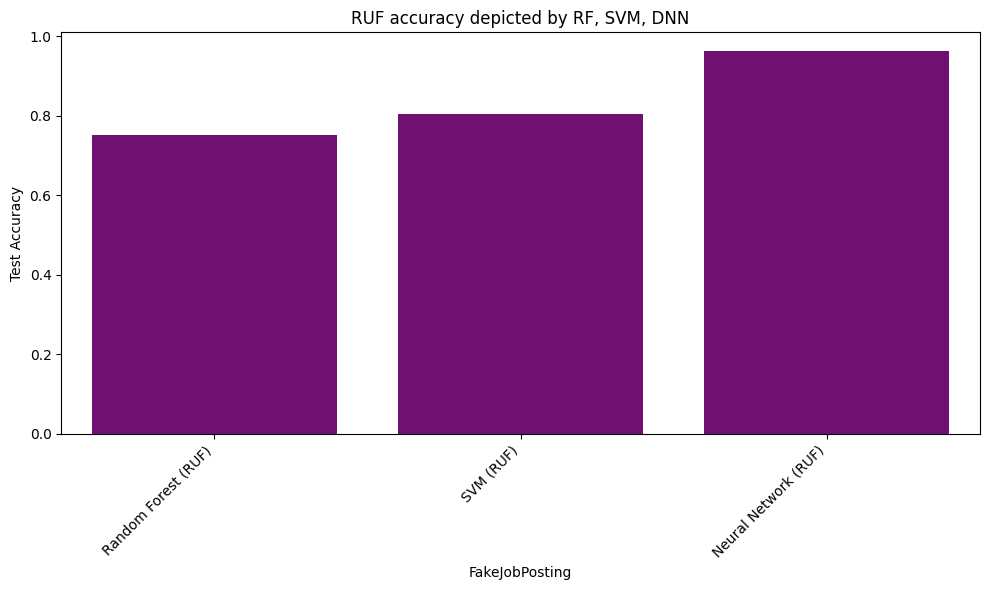

In [ ]:
test_accuracies = {
    'Random Forest (RUF)': accuracy_rf_random_undersampling,
    'SVM (RUF)': accuracy_svm_random_undersampling,
    'Neural Network (RUF)': accuracy_dnn_random_undersampling,
}


# Plotting the test accuracy for each algorithm

plt.figure(figsize=(10, 6))
sns.barplot(x=list(test_accuracies.keys()), y=list(test_accuracies.values()), color='purple')
plt.xticks(rotation=45, ha='right')
plt.title('RUF accuracy depicted by RF, SVM, DNN')
plt.xlabel('FakeJobPosting')
plt.ylabel('Test Accuracy')
plt.tight_layout()
plt.show()

#**USING GAMMA DISTRIBUTION (RF, SVM, DNN)**

In [ ]:
import numpy as np
from sklearn.utils import resample
from sklearn.utils import shuffle
import pandas as pd

# Assuming 'X' is your feature matrix and 'y' is your target vector

# Separate minority and majority classes
X_minority = X_scaled[y == 1]
X_majority = X_scaled[y == 0]

# Determine the size of the minority class
minority_size = len(X_minority)

# Define parameters for the Gamma distribution
shape = 2.0  # Shape parameter of the Gamma distribution
scale = 1.0  # Scale parameter of the Gamma distribution

# Generate random indices for sampling from the majority class
#gamma_indices = pd.random.gamma(shape, scale, size=minority_size).astype(int)

gamma_indices = np.round(np.random.gamma(shape, scale, size=minority_size)).astype(int)

# Sample from the majority class using the Gamma indices
#X_majority_sampled = X_majority.iloc[gamma_indices]
X_majority_sampled = X_majority[gamma_indices]

# Combine minority class samples with sampled majority class samples
X_resampled = np.concatenate([X_minority, X_majority_sampled])
y_resampled = np.concatenate([pd.Series(np.ones(minority_size)), pd.Series(np.zeros(minority_size))])

# Shuffle the resampled data
X_resampled, y_resampled = shuffle(X_resampled, y_resampled, random_state=42)

# Check the class distribution after resampling
print("Class distribution after Gamma distribution-based sampling:")
print(pd.Series(y_resampled).value_counts())

Class distribution after Gamma distribution-based sampling:
1.0    866
0.0    866
dtype: int64


In [ ]:
# Training the classifier
clf_balanced = RandomForestClassifier(random_state=42)
clf_balanced.fit(X_resampled, y_resampled)

# Predictions
y_pred = clf_balanced.predict(X_test)

# Step 4: Record precision and recall
precision_recall = classification_report(y_test, y_pred, output_dict=True)

accuracy_rf_gamma = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy_rf_gamma)

pd.DataFrame(precision_recall)

Accuracy: 0.05536912751677853


,0,1,accuracy,macro avg,weighted avg
precision,1.000000,0.05272,0.055369,0.526360,0.950199
recall,0.002952,1.00000,0.055369,0.501476,0.055369
f1-score,0.005886,0.10016,0.055369,0.053023,0.010842
support,1694.000000,94.00000,0.055369,1788.000000,1788.000000


In [ ]:
# Initialize the SVM classifier
svm_classifier = SVC(kernel='linear', random_state=42)

# Train the SVM classifier
svm_classifier.fit(X_resampled, y_resampled)

# Make predictions on the testing set
y_pred = svm_classifier.predict(X_test)

# Evaluate the model's performance
accuracy_svm_gamma = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy_svm_gamma)
print("\nClassification Report:\n", report)

Accuracy: 0.09451901565995526

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.04      0.08      1694
           1       0.05      1.00      0.10        94

    accuracy                           0.09      1788
   macro avg       0.53      0.52      0.09      1788
weighted avg       0.95      0.09      0.09      1788



In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense


#Splitting data into: features (X) and target (y)
X = data.drop(columns=['fraudulent'])
y = data['fraudulent']

#Split the data into training, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Define the model architecture
model = Sequential([
    Dense(64, activation='relu', input_shape=(4,)),  # Input layer
    Dense(64, activation='relu'),  # Hidden layer
    Dense(1, activation='sigmoid')  # Output layer (binary classification)
])

# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
'''
print(X_train.shape)
print(model.input_shape)
'''

# Train the model
history = model.fit(X_train,y_train, epochs=10, batch_size=32, validation_data=(X_val_bal, y_val_bal))

# Evaluate the model on the test set
loss, accuracy_dnn_gamma = model.evaluate(X_test, y_test)

# Make predictions
y_pred = model.predict(X_test)

test_accuracy_percentage = accuracy_dnn_gamma * 100

print("Test Accuracy dnn gamma: {:.2f}%".format(test_accuracy_percentage))

Epoch 1/10
447/447 [==============================] - 2s 3ms/step - loss: 0.1820 - accuracy: 0.9513 - val_loss: 1.3164 - val_accuracy: 0.5000
Epoch 2/10
447/447 [==============================] - 1s 2ms/step - loss: 0.1566 - accuracy: 0.9524 - val_loss: 1.2417 - val_accuracy: 0.5000
Epoch 3/10
447/447 [==============================] - 1s 3ms/step - loss: 0.1510 - accuracy: 0.9567 - val_loss: 1.2653 - val_accuracy: 0.5000
Epoch 4/10
447/447 [==============================] - 2s 4ms/step - loss: 0.1454 - accuracy: 0.9574 - val_loss: 1.0101 - val_accuracy: 0.6609
Epoch 5/10
447/447 [==============================] - 1s 2ms/step - loss: 0.1423 - accuracy: 0.9598 - val_loss: 1.0340 - val_accuracy: 0.6609
Epoch 6/10
447/447 [==============================] - 1s 2ms/step - loss: 0.1392 - accuracy: 0.9613 - val_loss: 1.0489 - val_accuracy: 0.6667
Epoch 7/10
447/447 [==============================] - 1s 2ms/step - loss: 0.1374 - accuracy: 0.9634 - val_loss: 0.9796 - val_accuracy: 0.6609
Epoch 

#**END OF ANALYSIS**

In [ ]:
SMOTE_mean = (accuracy_rf + accuracy_svm + accuracy_dnn) / 3 * 100
print("SMOTE avg: ", SMOTE_mean)

adasyn_mean = (accuracy_rf_adasyn + accuracy_svm_adasyn + accuracy_dnn_adasyn) / 3 * 100
print("Adasyn avg: ", adasyn_mean)

ros_mean = (accuracy_rf_random_oversampling + accuracy_svm_random_oversampling + accuracy_dnn_random_oversampling) / 3 * 100
print("ROS avg: ", ros_mean)

ruf_mean = (accuracy_rf_random_undersampling + accuracy_svm_random_undersampling + accuracy_dnn_random_undersampling) / 3 * 100
print("RUF avg: ", SMOTE_mean)

Gamma_mean = (accuracy_rf_gamma + accuracy_svm_gamma + accuracy_dnn_gamma) / 3 * 100
print("Gamma avg: ", Gamma_mean)

SMOTE avg:  85.34054120855784
Adasyn avg:  83.20283335060616
ROS avg:  90.64131209780972
RUF avg:  85.34054120855784
Gamma avg:  37.117822476059175


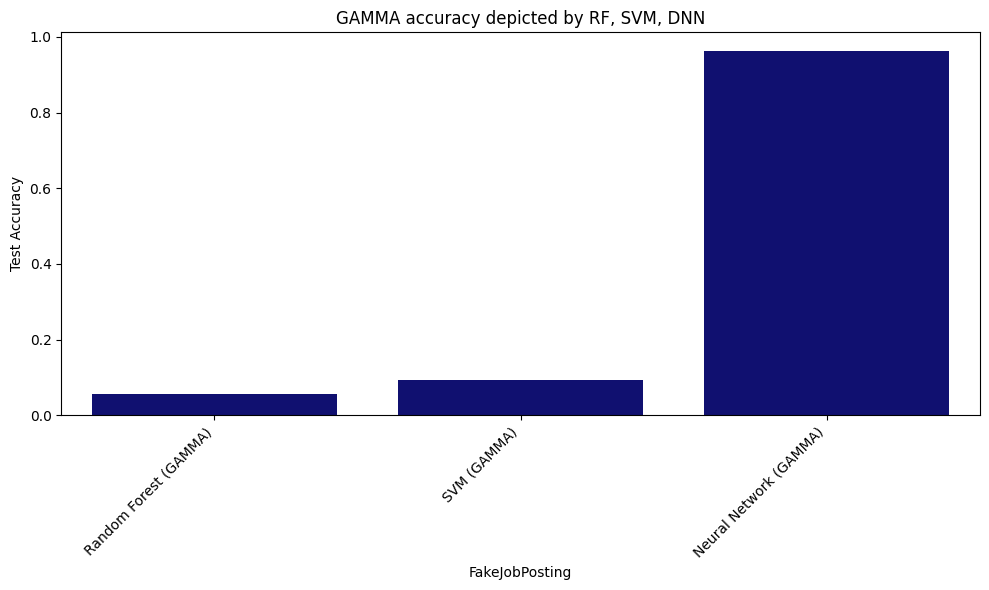

In [ ]:
test_accuracies = {
    'Random Forest (GAMMA)': accuracy_rf_gamma,
    'SVM (GAMMA)': accuracy_svm_gamma,
    'Neural Network (GAMMA)': accuracy_dnn_gamma,
}


# Plotting the test accuracy for each algorithm

plt.figure(figsize=(10, 6))
sns.barplot(x=list(test_accuracies.keys()), y=list(test_accuracies.values()), color='navy')
plt.xticks(rotation=45, ha='right')
plt.title('GAMMA accuracy depicted by RF, SVM, DNN')
plt.xlabel('FakeJobPosting')
plt.ylabel('Test Accuracy')
plt.tight_layout()
plt.show()

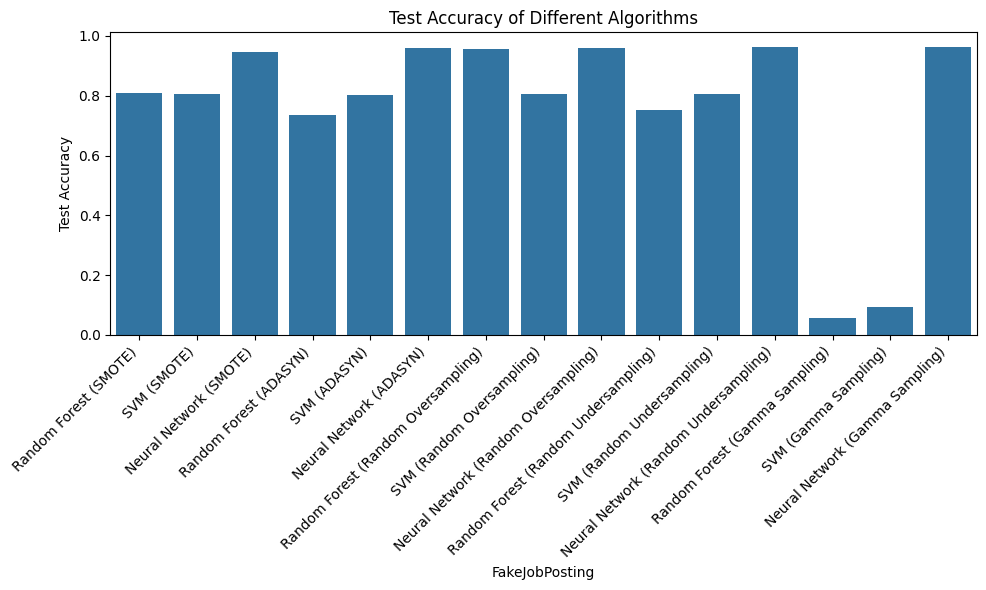

In [ ]:
# Store the test accuracies for each algorithm
# Adjusted dictionary to match your variables
test_accuracies = {
    'Random Forest (SMOTE)': accuracy_rf,
    'SVM (SMOTE)': accuracy_svm,
    'Neural Network (SMOTE)': accuracy_dnn,
    'Random Forest (ADASYN)': accuracy_rf_adasyn,
    'SVM (ADASYN)': accuracy_svm_adasyn,
    'Neural Network (ADASYN)': accuracy_dnn_adasyn,
    'Random Forest (Random Oversampling)': accuracy_rf_random_oversampling,
    'SVM (Random Oversampling)': accuracy_svm_random_oversampling,
    'Neural Network (Random Oversampling)': accuracy_dnn_random_oversampling,
    'Random Forest (Random Undersampling)': accuracy_rf_random_undersampling,
    'SVM (Random Undersampling)': accuracy_svm_random_undersampling,
    'Neural Network (Random Undersampling)': accuracy_dnn_random_undersampling,
    'Random Forest (Gamma Sampling)': accuracy_rf_gamma,
    'SVM (Gamma Sampling)': accuracy_svm_gamma,
    'Neural Network (Gamma Sampling)': accuracy_dnn_gamma,
}


# Plotting the test accuracy for each algorithm
plt.figure(figsize=(10, 6))
sns.barplot(x=list(test_accuracies.keys()), y=list(test_accuracies.values()))
plt.xticks(rotation=45, ha='right')
plt.title('Test Accuracy of Different Algorithms')
plt.xlabel('FakeJobPosting')
plt.ylabel('Test Accuracy')
plt.tight_layout()
plt.show()
